# Tutorial

Sometimes background objects can masquerade as planet candidates. They reveal their true nature over time, however. Since direct imaging targets are typically bright, foreground stars with large proper motions, they move faster than the typical background star, and their proper motion difference, added to the parallactic motion of the Earth causes them to follow a helical path. 

A pathological case can arise when a background star has a non-zero parallax or fast proper motions of it's own. Then, it takes longer and typically higher precision datasets to detect this helical motion. This tutorial will show the user how to calculate a simple stationary track, or fit for this more pathological case.

## The curious case of HD 131339 A "b"

Start by downloading the astrometry data on the companion candidate around HD 131339 A to the local working folder. This data was compiled from [Wagner et al. (2016)](https://ui.adsabs.harvard.edu/abs/2016Sci...353..673W/abstract), [Nielsen et al. (2017)](https://ui.adsabs.harvard.edu/abs/2017AJ....154..218N/abstract), and with additional observations from Wagner et al. (2022, data priv. comm.). Our analysis of the dataset follows Nielsen et al., but `backtracks` improves on the previous analysis in a few small ways (mostly leveraging updated Gaia DR3 information).

### Formatting input relative astrometry
This .csv file is formatted following `orbitize!` (documentation [here](https://orbitize.readthedocs.io/en/latest/formatting_inputs.html)), specifically their "epoch,  object,  quant1, quant1_err,  quant2, quant2_err, quant12_corr, quant_type" formatting. Mesurements are assumed to be in milliarcseconds [mas] or degrees (for positon angles). You can specify relative astrometry as "radec" or "seppa" using the quant_type column, and if these measurements do not have a correlation, quant12_corr can be set to nan. Even if your .csv input contains only measurements for a single candidate, it is important to have the 2nd column be the "object" column, where the value is 1 for the entire range of measurements. If you have a file with more than one candidate's astrometry recorded, set the keyword argument "obj_num" to the integer of the object you're currently examining (see an example [here]([https://backtracks.readthedocs.io/en/latest/additional-examples.html#Baade's-Window-(HD-165054),-Nguyen-et-al.-(2020))). The only distinction from the orbitize! format is that object = 0 can refer to a candidate you have labeled as "0", and does not refer to the host star (whose parameters are set implicitly by `backtracks`, except for host star RV which can be specified manually).

In [1]:
!wget https://github.com/wbalmer/backtracks/raw/refs/heads/main/tests/scorpions1b_orbitizelike.csv

--2025-02-10 13:06:12--  https://github.com/wbalmer/backtracks/raw/refs/heads/main/tests/scorpions1b_orbitizelike.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wbalmer/backtracks/refs/heads/main/tests/scorpions1b_orbitizelike.csv [following]
--2025-02-10 13:06:12--  https://raw.githubusercontent.com/wbalmer/backtracks/refs/heads/main/tests/scorpions1b_orbitizelike.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 831 [text/plain]
Saving to: ‘scorpions1b_orbitizelike.csv’

scorpions1b_orbitiz 100%[===================>]     831  --.-KB/s    in 0s      

2025-02-10 13:06:13 (6.66 MB/s) - ‘s

## Initialization

Then, import the `System` class from the `backtracks` package.

In [2]:
from backtracks import System

Now, we can set up the `System` class. We'll provide it with: 
1) the Simbad resolvable name of our host star of interest `target_name=[your star's name]`
2) a .csv file containing the relative positions of our candidate source around our host star (`candidate_file=[your .csv file here`, see the example .csv for an example).
3) a range in degrees around which we'll construct a local sample of proper motions and parallaxes from _Gaia_ (`nearby_window=0.5`, the default is 0.5 degrees, which is fine for most cases)
4) a path to a directory to save our figures and intermediate data products (`fileprefix=[your/path/here/]`)

In [3]:
track = System(target_name="HD 131399A",
               candidate_file="scorpions1b_orbitizelike.csv",
               nearby_window=0.5,
               fileprefix='./')

[BACKTRACKS INFO]: Resolved the target star 'HD 131399A' in Simbad!
[BACKTRACKS INFO]: Resolved target's Gaia ID from Simbad, Gaia DR3 6204835284262018688
INFO: Query finished. [astroquery.utils.tap.core]
[BACKTRACKS INFO]: gathered Gaia DR3 data for HD 131399A
   * Gaia source ID = 6204835284262018688
   * Reference epoch = 2016.0
   * RA = 223.6053 deg
   * Dec = -34.1429 deg
   * PM RA = -30.70 mas/yr
   * PM Dec = -30.77 mas/yr
   * Parallax = 9.75 mas
   * RV = 15.61 km/s
INFO: Query finished. [astroquery.utils.tap.core]
[BACKTRACKS INFO]: gathered 6445 Gaia objects from the 0.5 sq. deg. nearby HD 131399A
[BACKTRACKS INFO]: Finished nearby background gaia statistics
[BACKTRACKS INFO]: Queried distance prior parameters, L=2524.23, alpha=1.05, beta=0.62
[BACKTRACKS INFO]: Estimating candidate position if stationary in RA,Dec @ 2016.0 from observation #0
[BACKTRACKS INFO]: Opened ephemeris file


The `backtracks.System` class queries Simbad, then _Gaia_ and retrieves both the _Gaia_ parameters for the host star and the distribution of parameters for all the stars nearby (this is useful for quantifying whether your candidate's motion is an outlier in terms of velocity or distance). It then sets up the stationary, infinite distance background object case, and compares the data to this track. Let's take a look at that visually:

## Stationary, infinite distance background track

[BACKTRACKS INFO]: Generating Stationary plot
[BACKTRACKS INFO]: Stationary plot saved to ./


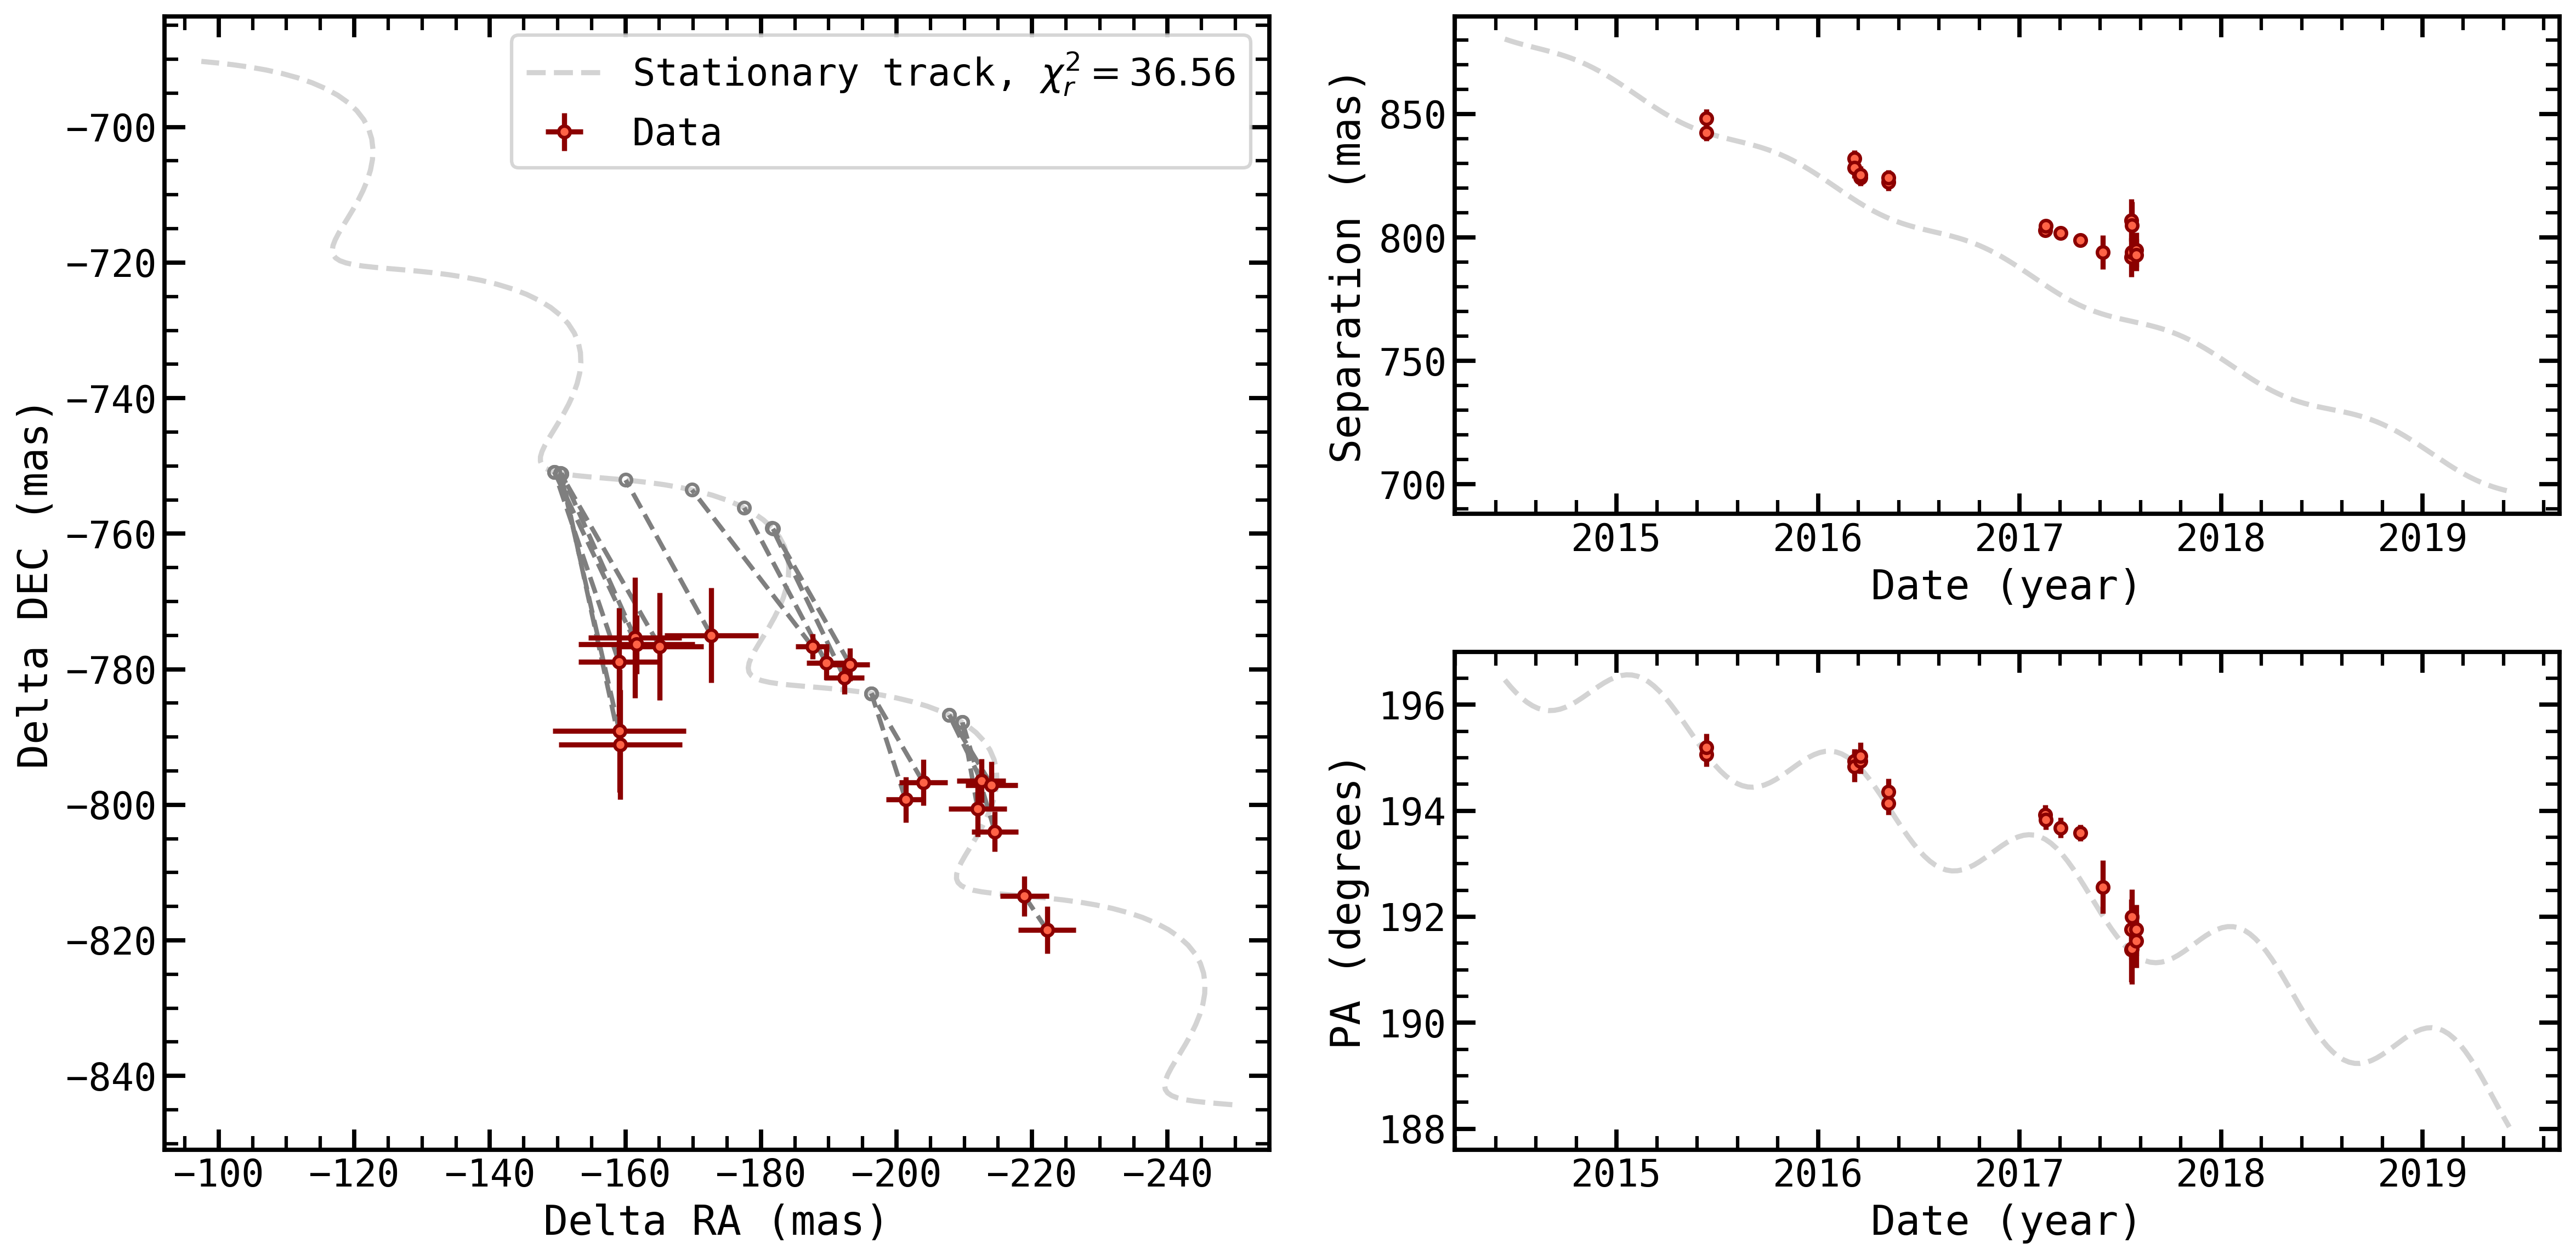

In [4]:
fig_stationary = track.generate_stationary_plot(days_backward=1.*365.,
                                                days_forward=4.*365,
                                                step_size=10.,
                                                filepost='.png')

## Generate arrays of RA, Dec for a given set of parameters and times

While we like to think our built in plots are pretty great, you can use `backtracks` to generate arrays of RA and Dec for a given set of parameters on a given array of times, so that you can create your own visualizations or analyses. You just need to initialize a `System` and pass the system, an array of julian days (in terrestrial time), and an array of parameters to `backtracks.utils.radecdists`.

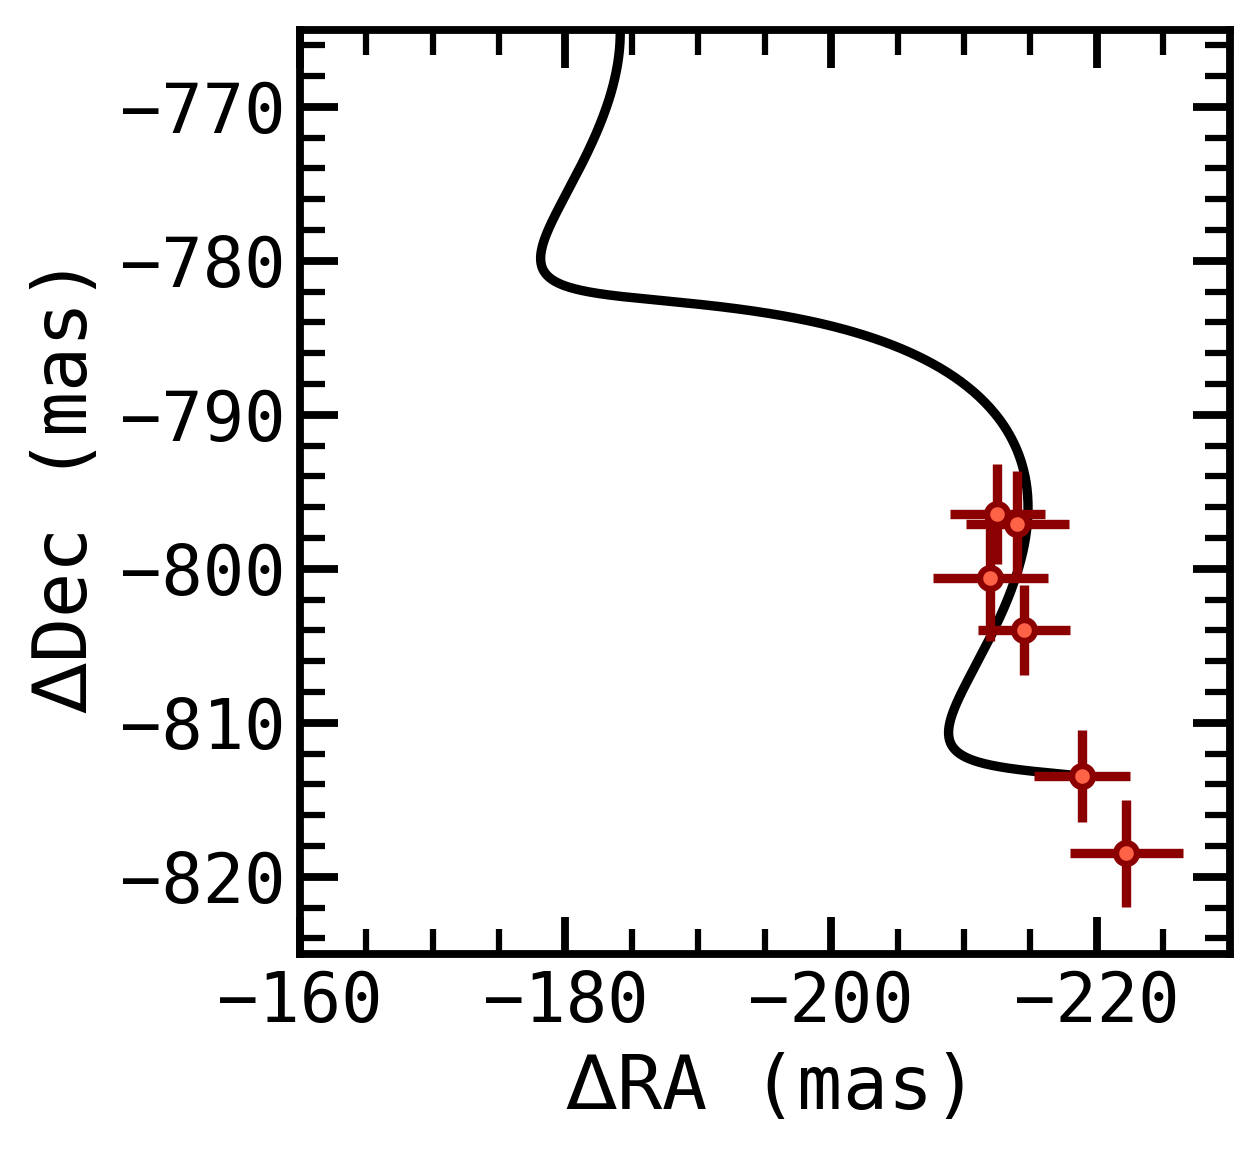

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from backtracks.utils import radecdists, utc2tt
# create an array of times
projected_epochs = np.arange(Time('2015-06-12').jd, Time('2017-01-12').jd, 1)
projected_epochs_tt = utc2tt(projected_epochs)

# we need an array of parameters, which are
# ra, dec, pmra, pmdec, par, ra_host, dec_host, pmra_host, pmdec_host, par_host, rv_host
# in many cases, we're just interested in the stationary case, so we can pull the array of those parameters directly from our System
parameters = track.stationary_params

# now, we just call the System.radecdists function
ras, decs = radecdists(track, projected_epochs_tt, parameters) # these array have units mas

# and we'll plot the results to prove this works
plt.figure(figsize=(4,4))
plt.plot(ras, decs, c='k', zorder=-1)

plt.xlim(-160, -230)
plt.ylim(-825, -765)

# and we can throw up some data
plt.errorbar(track.ras[0:6], track.decs[0:6], yerr=track.decserr[0:6], xerr=track.raserr[0:6],
             color="tomato",ecolor='darkred', linestyle="none",
             marker='o', ms=5., mew=1.5, mec='darkred')

# and label the axes
plt.xlabel('$\Delta$RA (mas)')
plt.ylabel('$\Delta$Dec (mas)')

plt.show()

It looks like the stationary, infinite distance case is a pretty poor fit to this data. Does that mean these are observations of a planet?! Unfortunately, no. The fit is poor, but the data and this helical motion share some visual similarities that might prompt us to consider continuing to use `backtracks` to investigate.

## Fitting for moving, finite distance background tracks

We can set up and run a `fit` that will use the nested sampling package `dynesty` to explore varying the proper motion and parallax of a background star, and compare this apparent helical motion to our data.

`fit` takes a number of parameters, not all of which you might care about at the start. You can set any combination of these parameters to:
1) sample more coarsely (lower nlive), or more finely (increase nlive)
2) speed up convergence but sacrifice precision (increase dlogz, e.g. to 1 or 10). 
3) use more cpu cores (set npool higher)
4) sample the posterior fully (set dynamic=True) but note that this can take a while!
5) run on a cluster with mpi_pool = True
6) resume from a previous run

or, depending on your case, to speed up convergence on a different dataset 7) use a different sampling method (e.g. 'rwalk' or 'rslice')

Let's run a coarse, initial fit that will terminate rather early to get a handle on the results of `backtracks`. For a more accurate assessment, we'd recommend you use more live points `nlive=1000`, and we'd recommend exploring dynamic sampling to flesh out your posterior distribution with `dynamic=True`. Note that if your data is _not_ well described by helical background track motion, these fits will struggle to converge, so we recommend you always start by comparing your data to the stationary case, and run a coarse, easily terminated inital run before spending computation time on a full `fit`. 

In [6]:
results = track.fit(nlive=400, dlogz=0.1, npool=4, dynamic=False, mpi_pool=False, resume=False, sample_method='unif')

[BACKTRACKS INFO]: Beginning sampling


iter: 10387 | +400 | bound: 85 | nc: 1 | ncall: 65124 | eff(%): 16.666 | loglstar:   -inf < -99.763 <    inf | logz: -123.369 +/-  0.234 | dlogz:  0.000 >  0.100                                     

## Save and load results

We'll save our results to disk, so that we can access them without re-running the sampler:

In [7]:
track.save_results(fileprefix='./')

[BACKTRACKS INFO]: Saving results to ./HD_131399A_dynestyrun_results.pkl


And we can load those results (initializing the `track` object with the `System` class in the same way as above):

In [8]:
track.load_results(fileprefix='./')

[BACKTRACKS INFO]: Loading results from ./HD_131399A_dynestyrun_results.pkl


## Plotting your fit

You can then plot the results of your `fit` using the functions in `backtracks.plotting`. We have two convenience functions within the `System` class to generate these plots with a single line of code (the first of which we used above to generate the stationary track plot). We'll generate a plot of the visual helix, a plot of the posterior distribution of parameters, a plot of diagnostics for the `dynesty` sampler run, a plot showing the prior on parallax we've assumed, and a plot of our median sample compared to the distribution of nearby _Gaia_ measurements.

[BACKTRACKS INFO]: Generating Plots


/Users/wbalmer/codebank/backtracks/backtracks/plotting.py:79: RuntimeWarning: divide by zero encountered in divide
  ppf = 1000./transform_gengamm(u, backtracks.L, backtracks.alpha, backtracks.beta)


[BACKTRACKS INFO]: Plots saved to ./


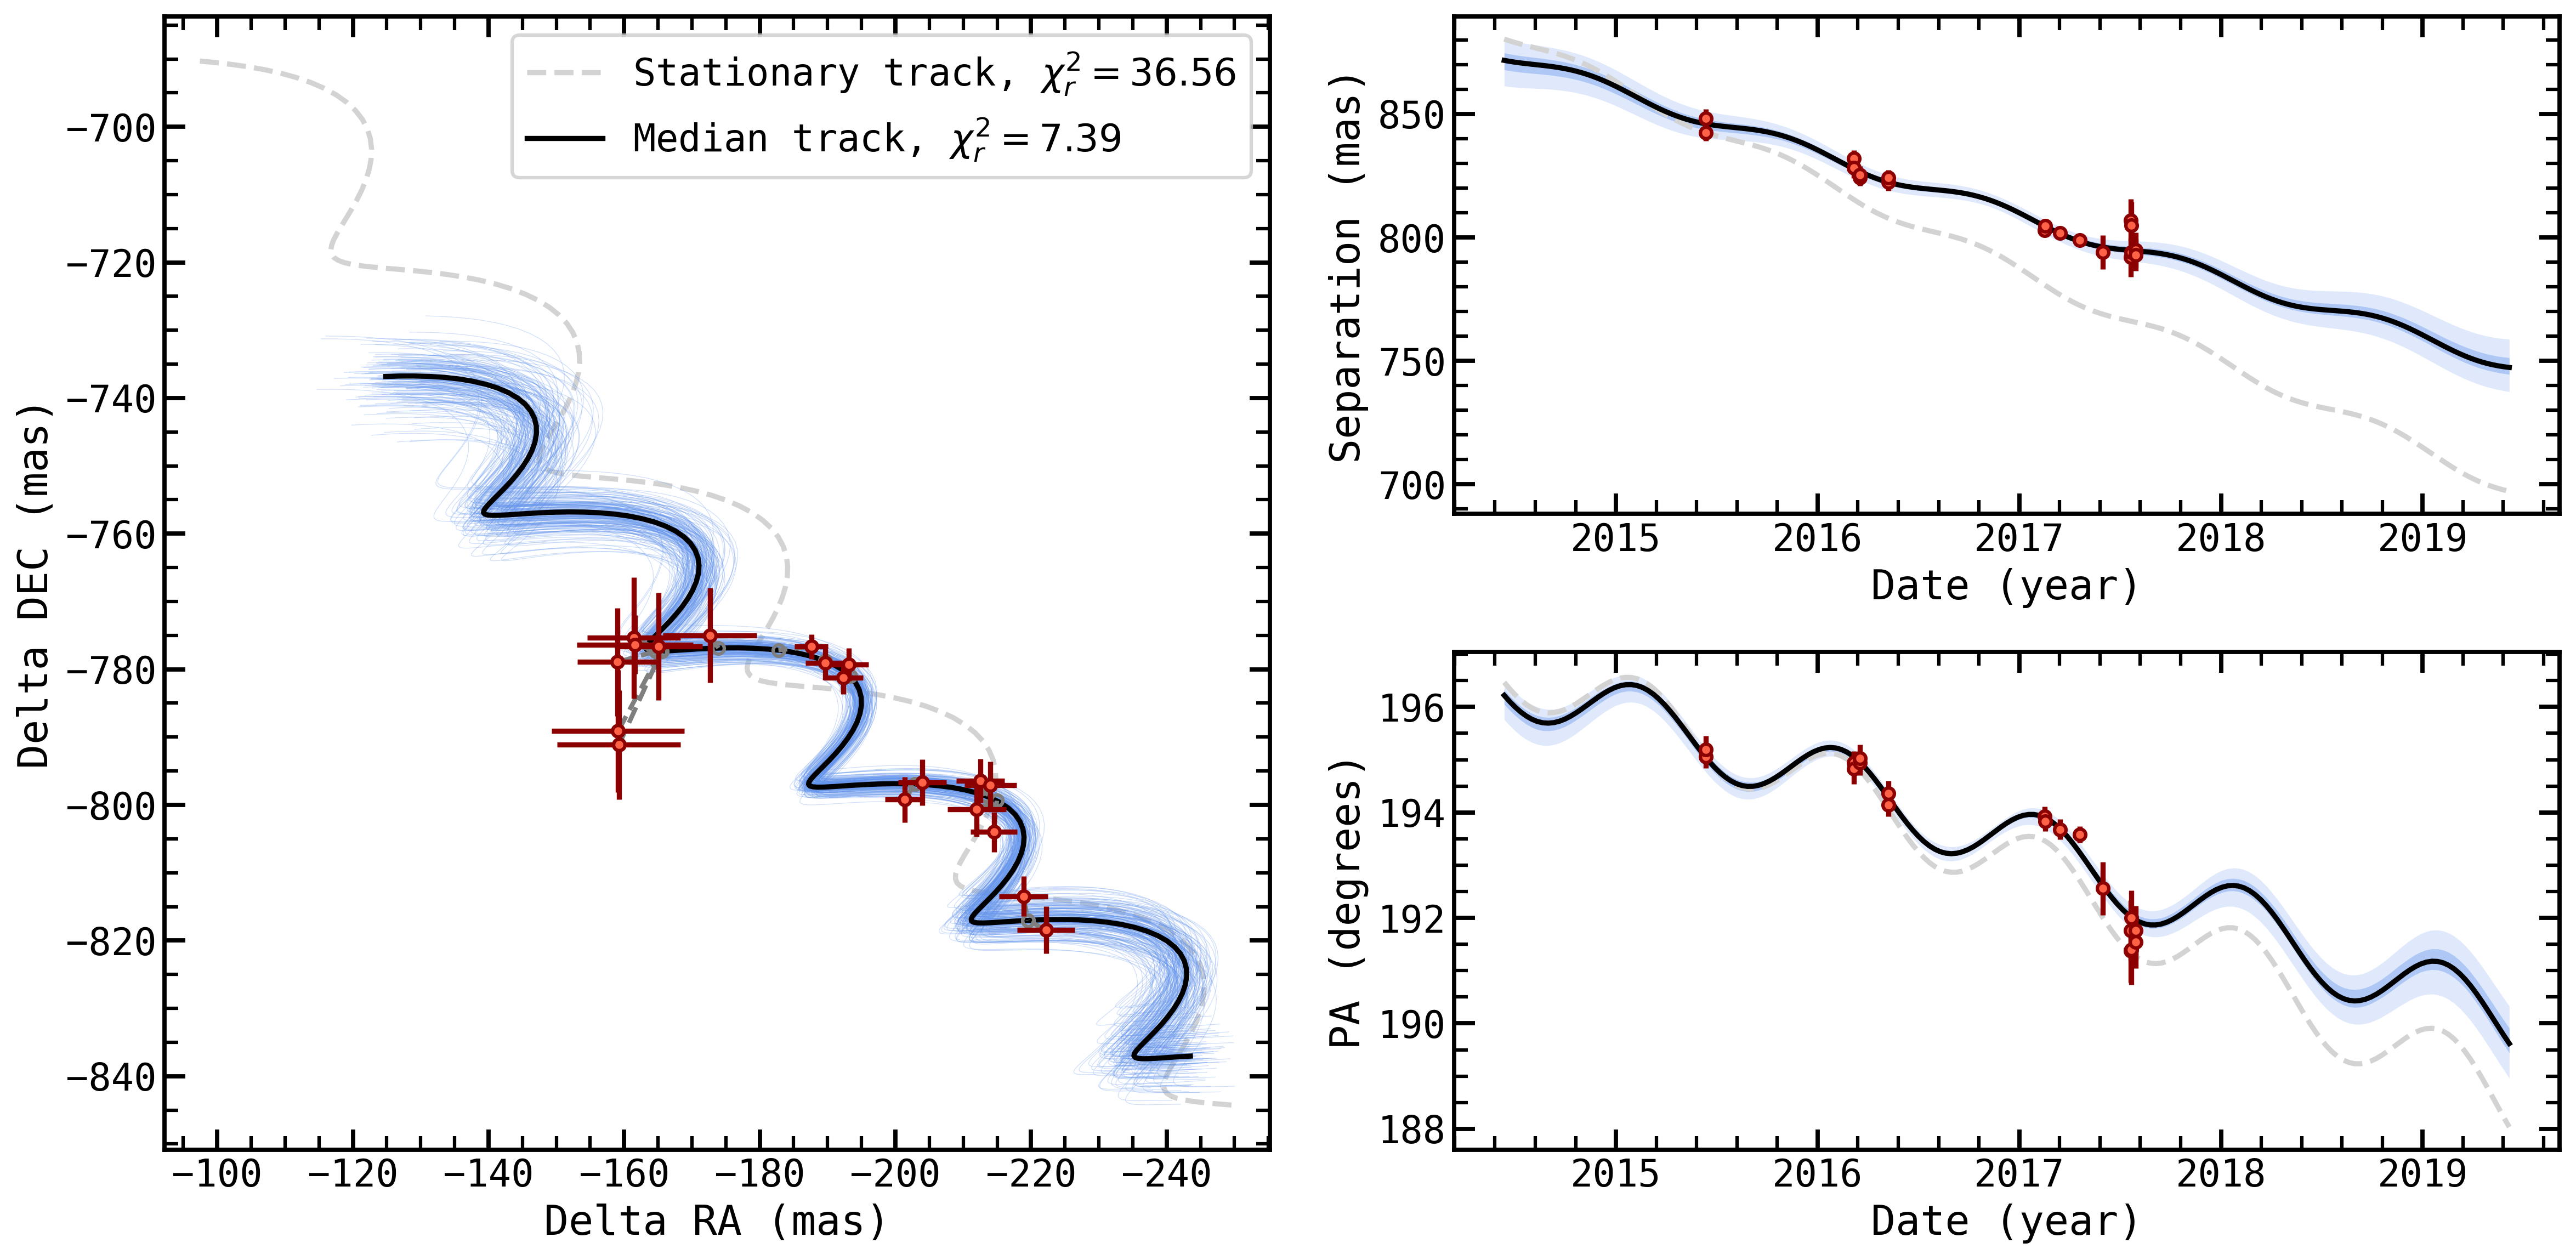

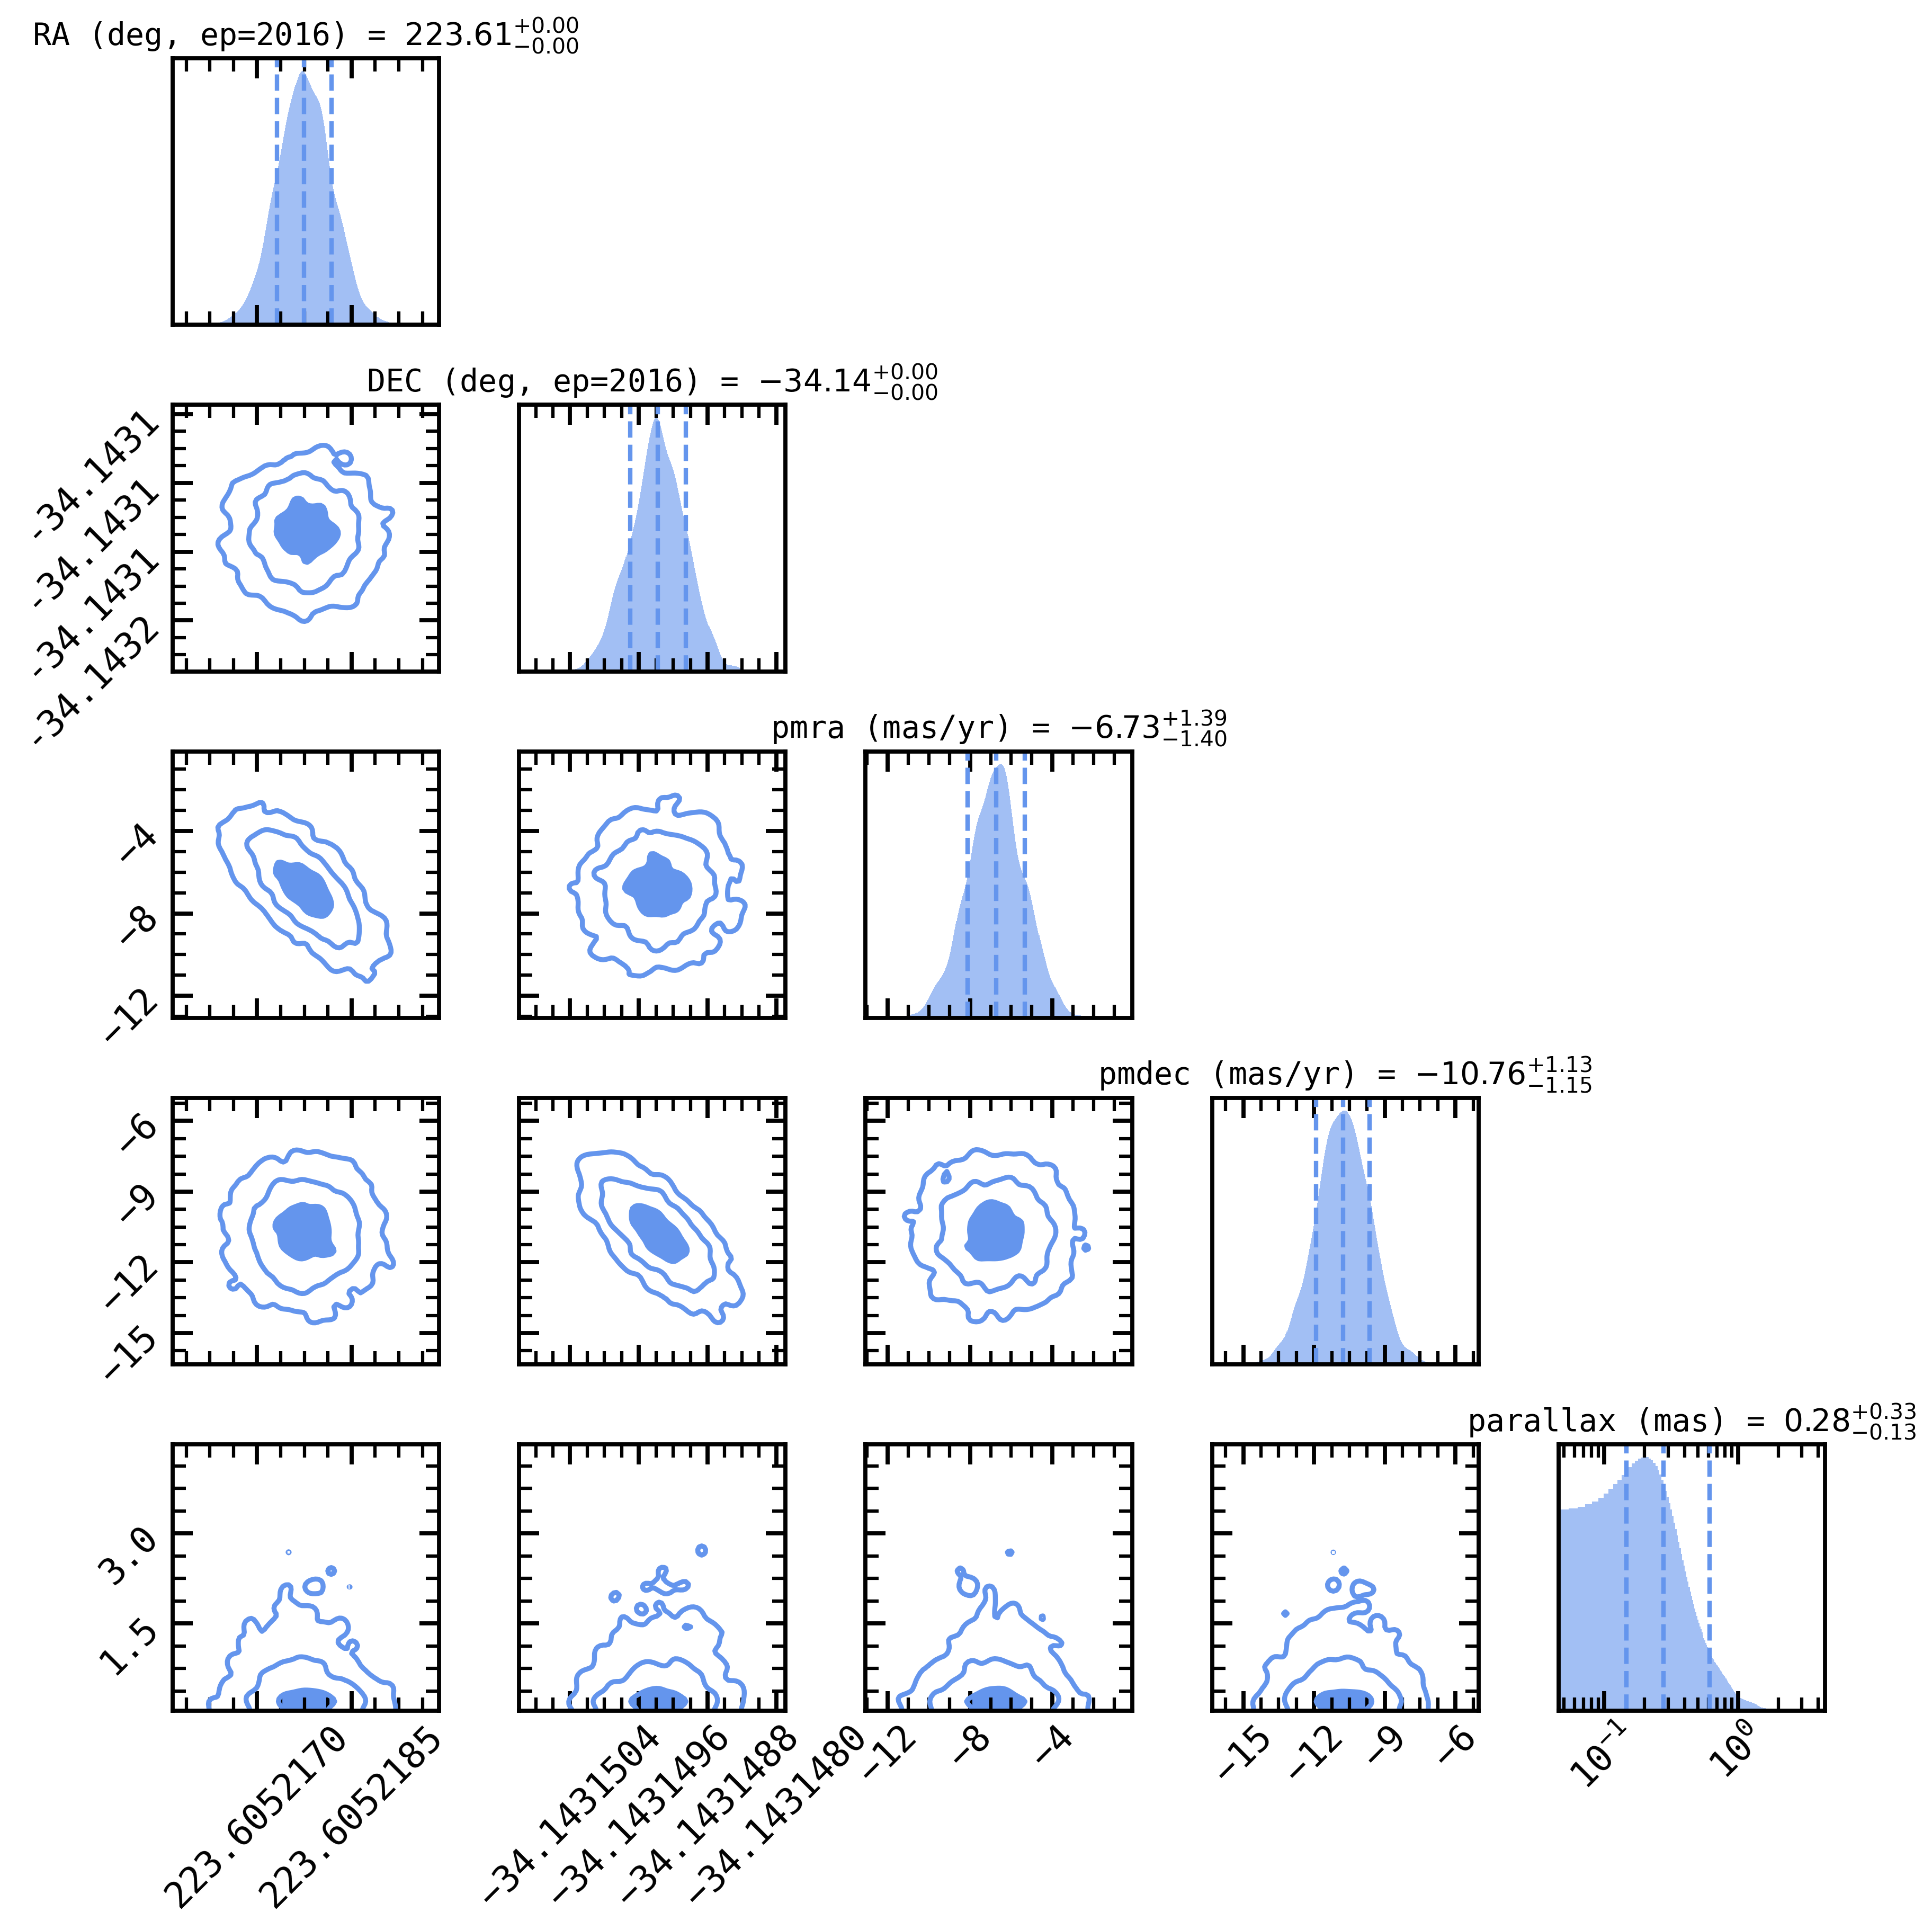

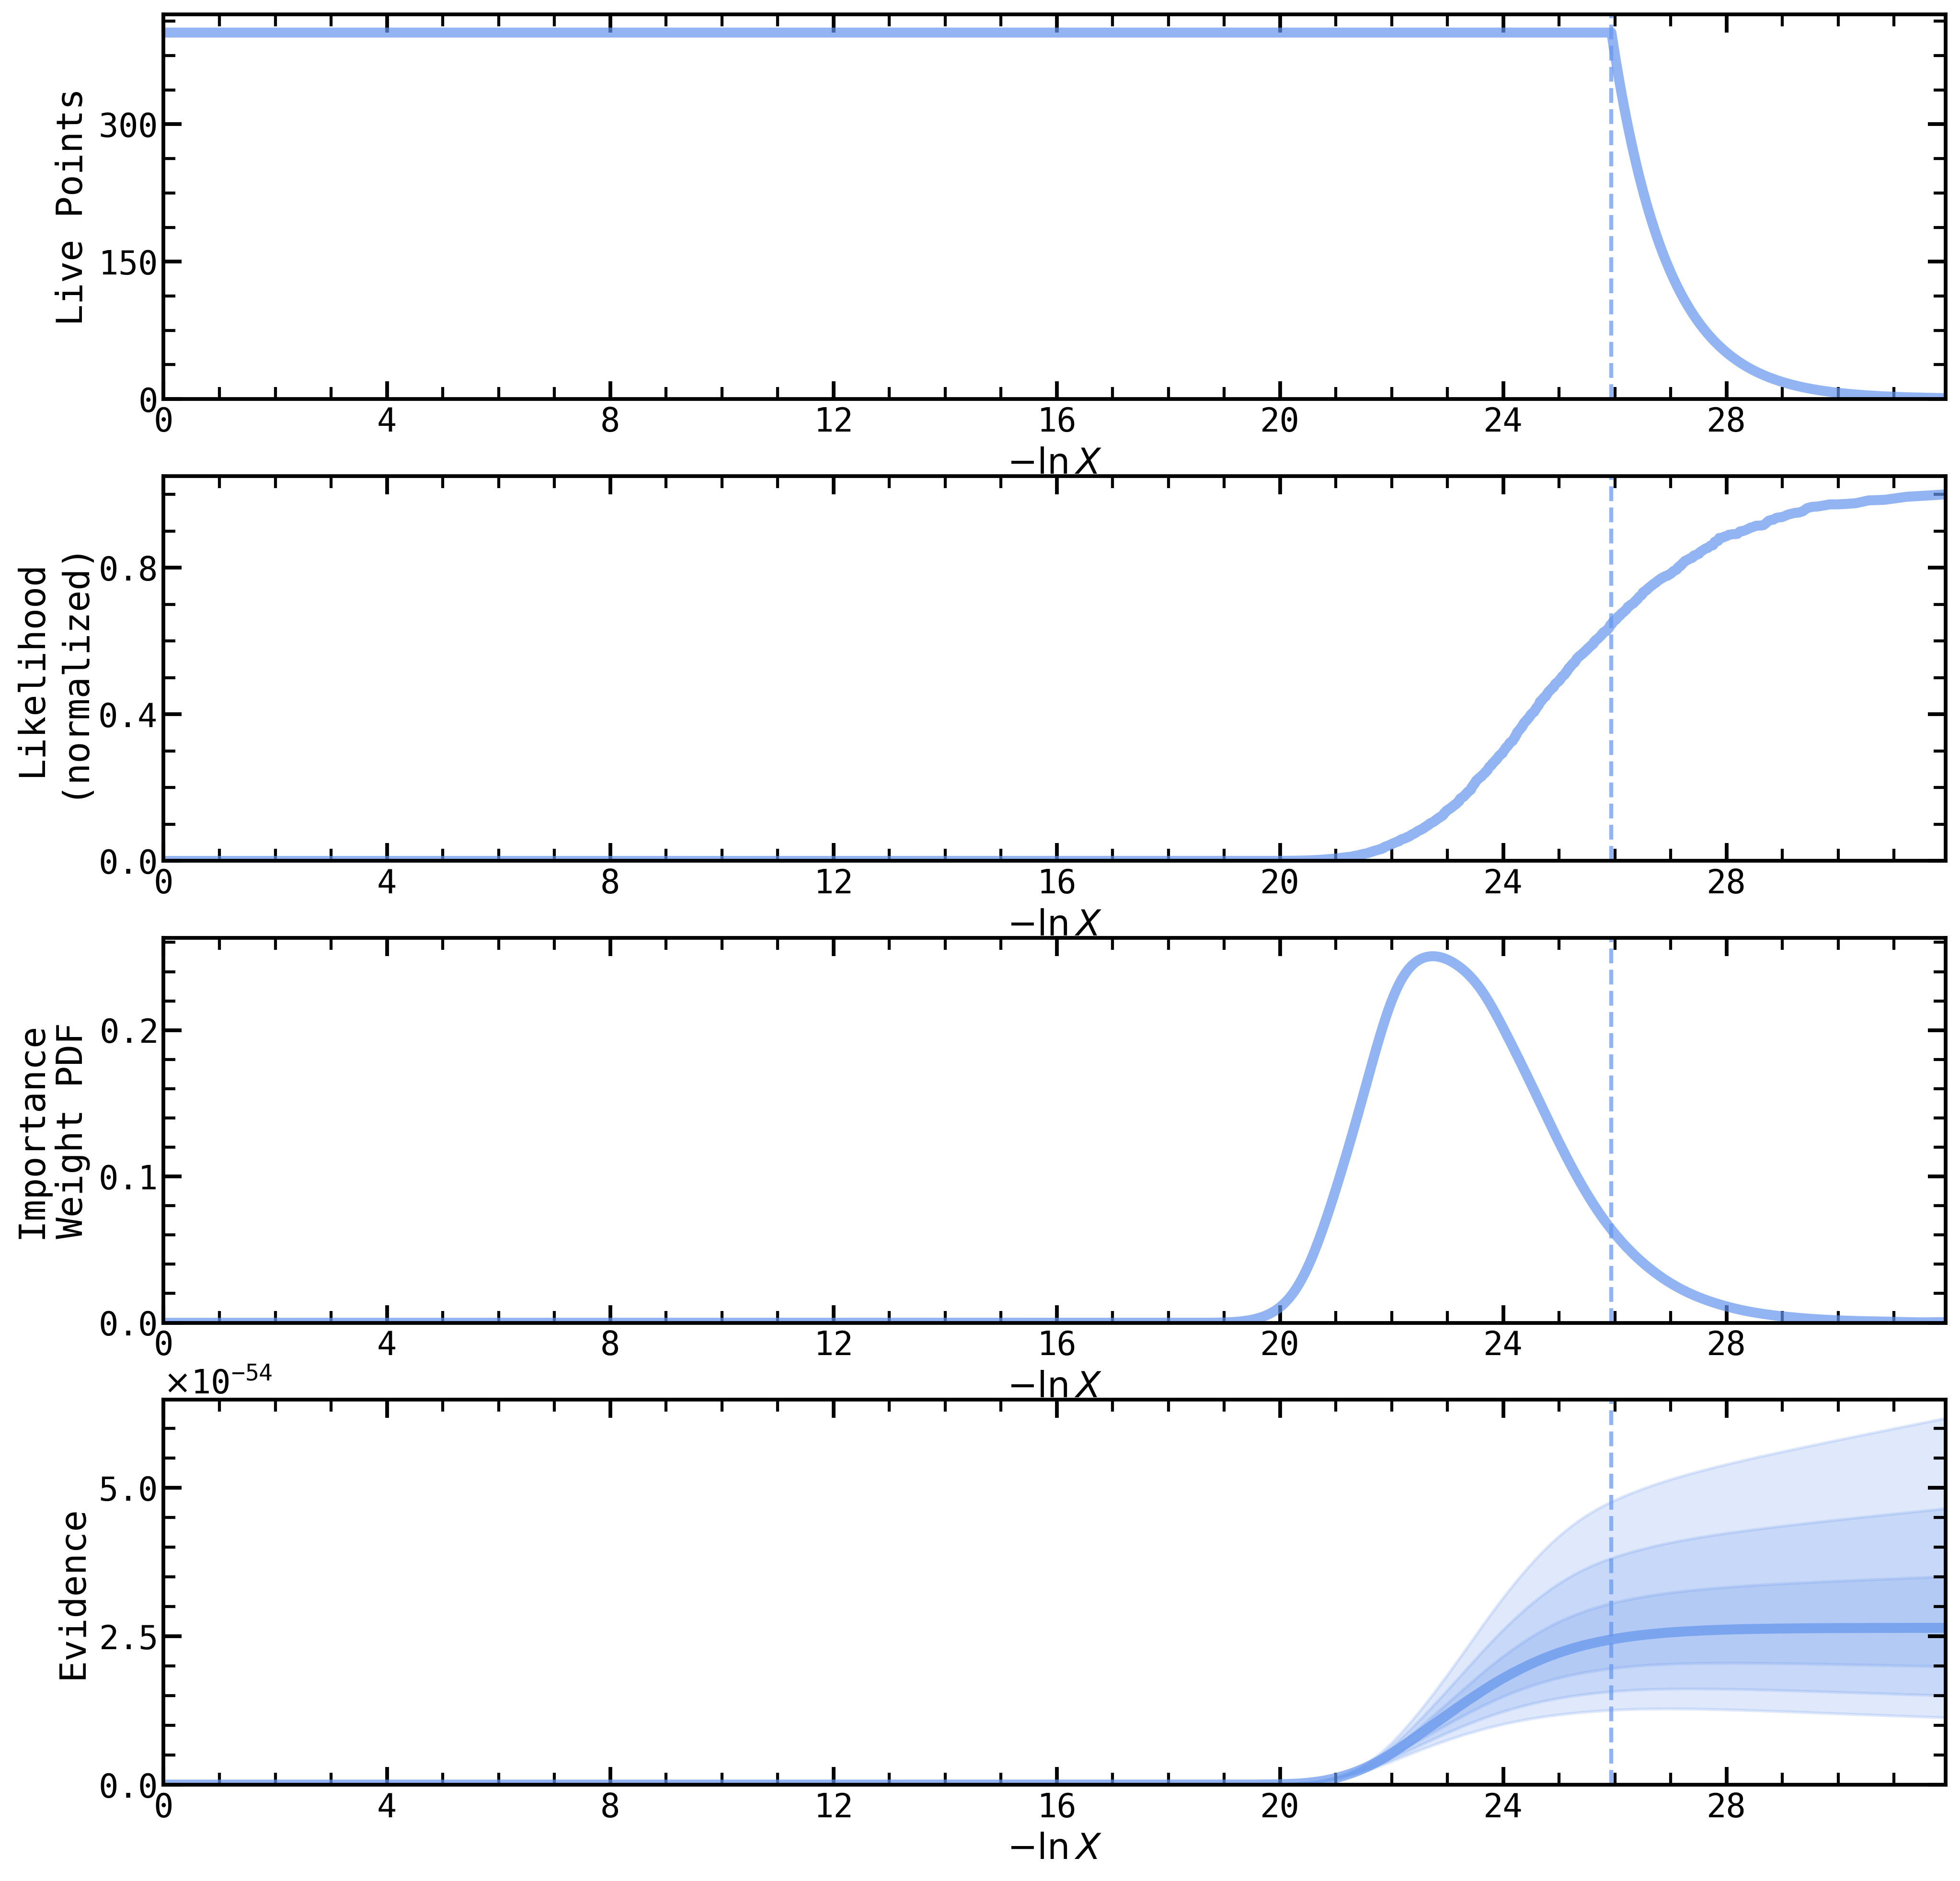

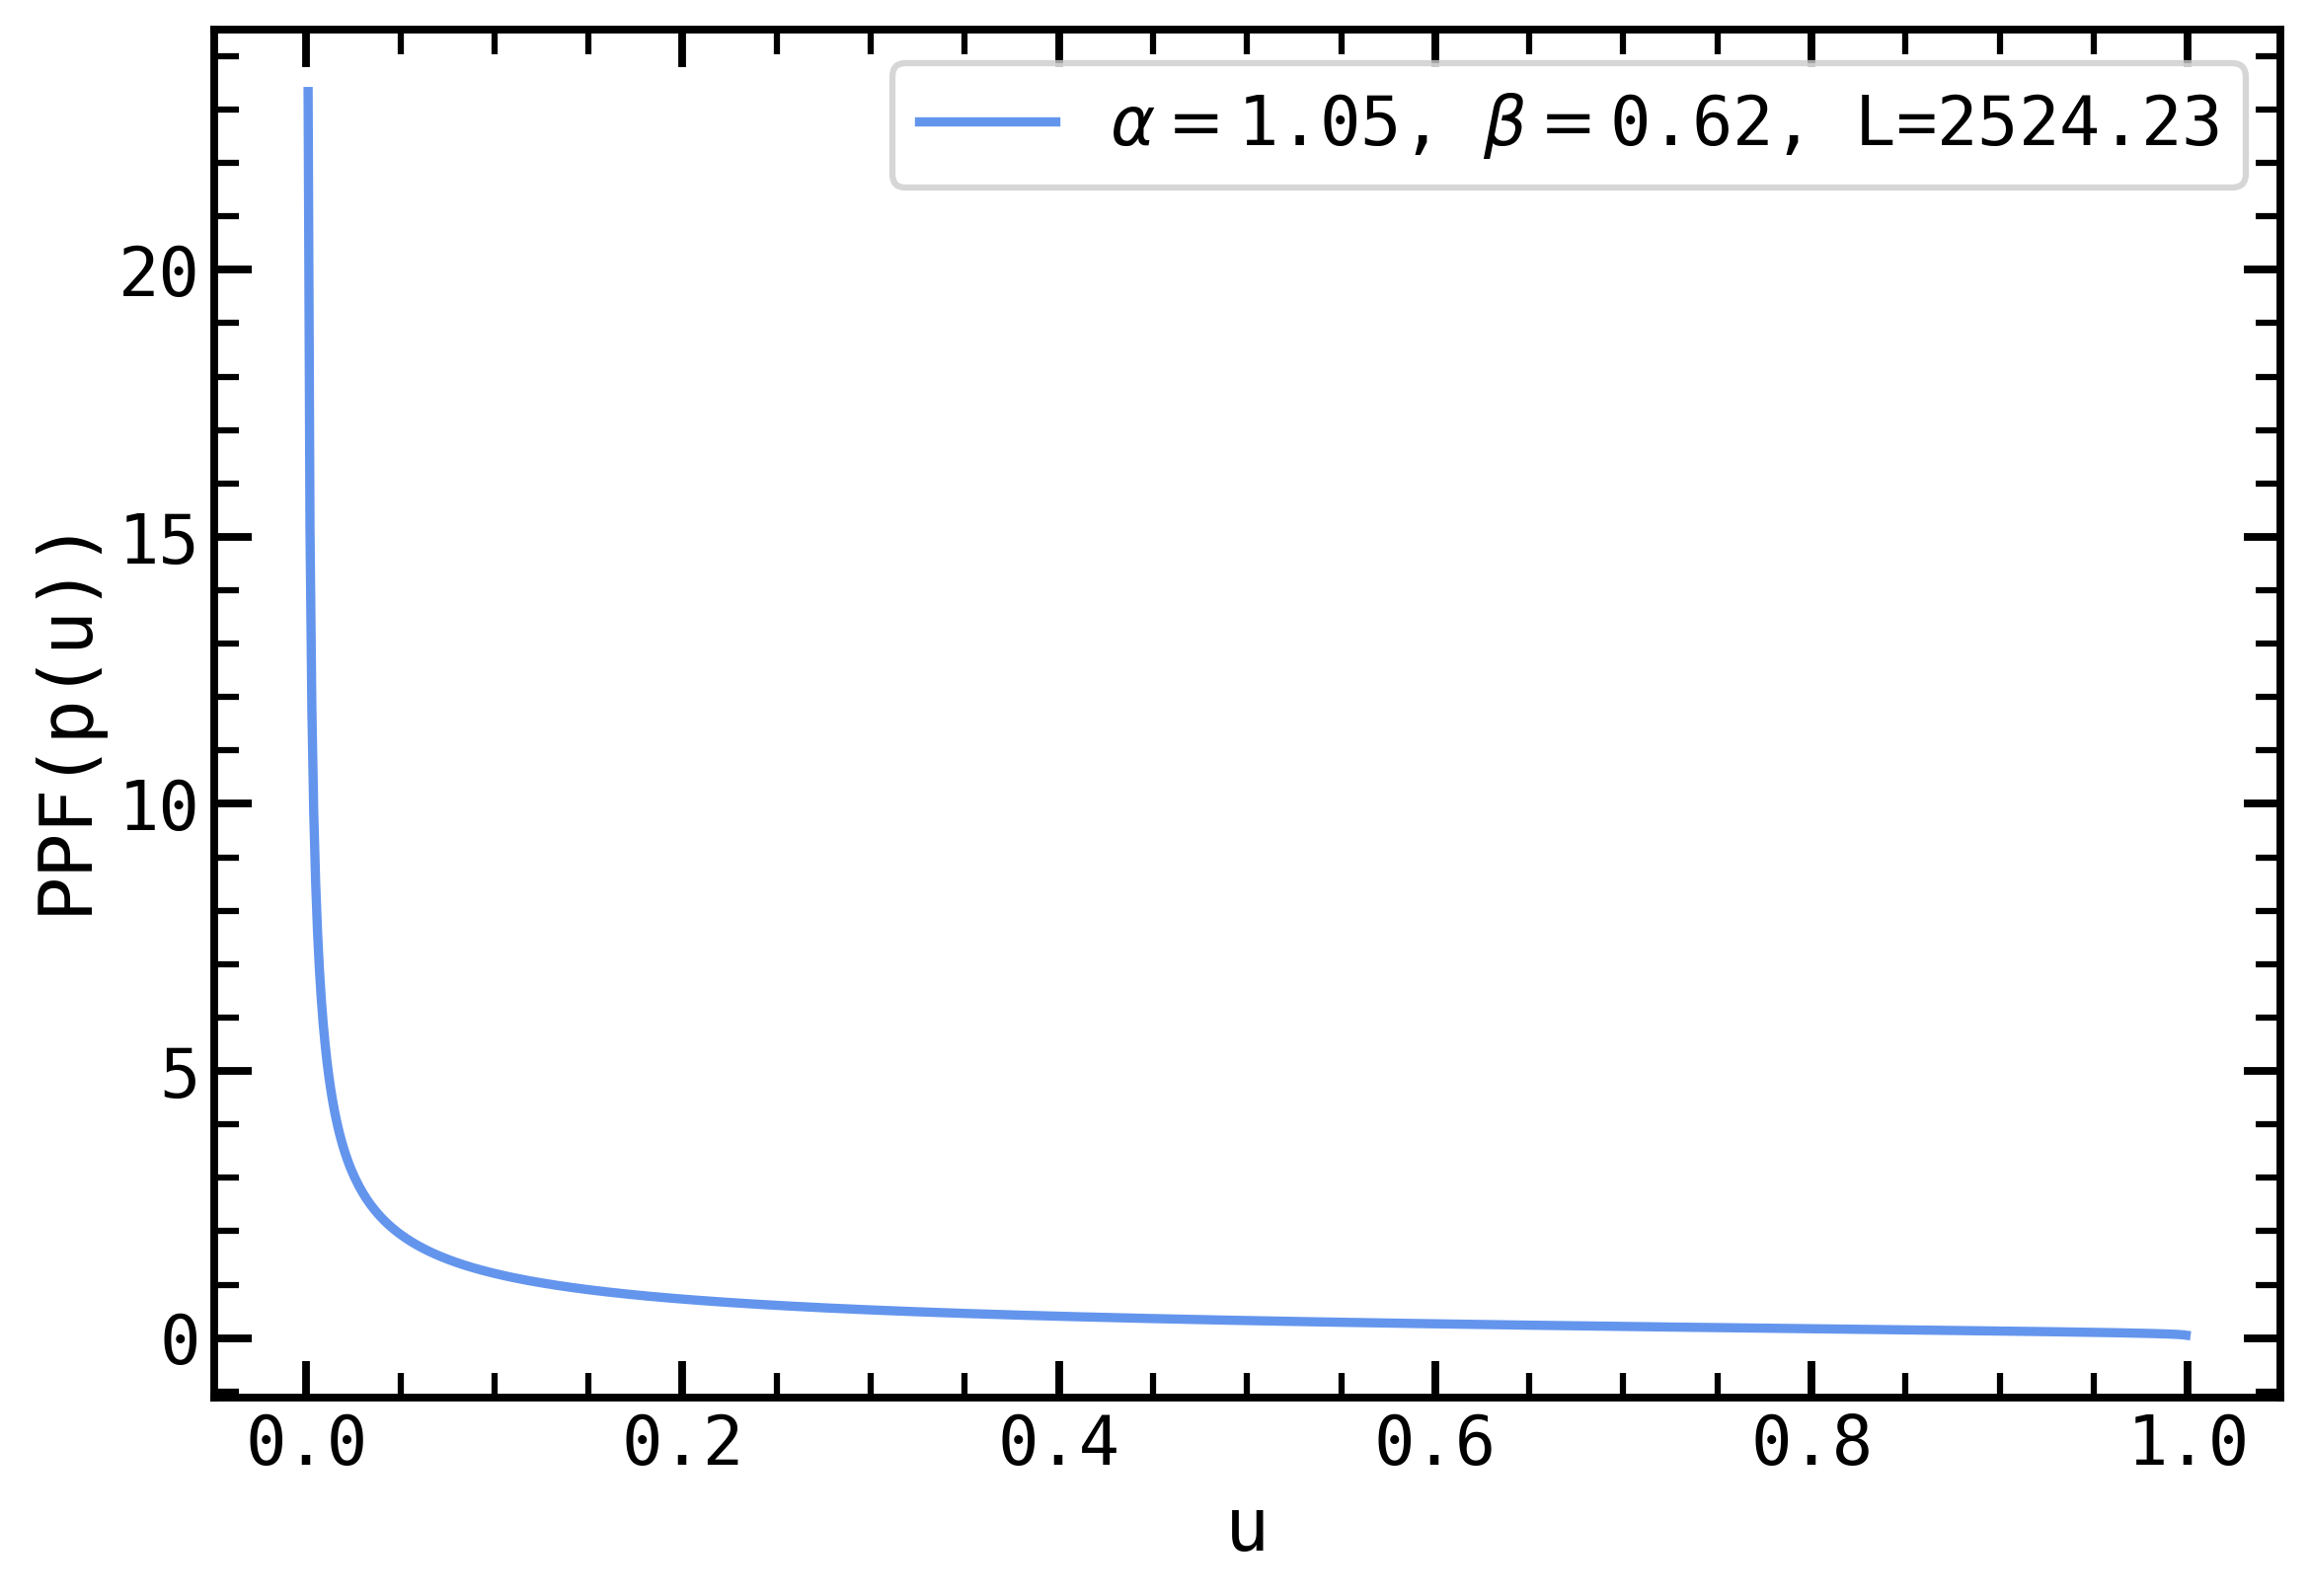

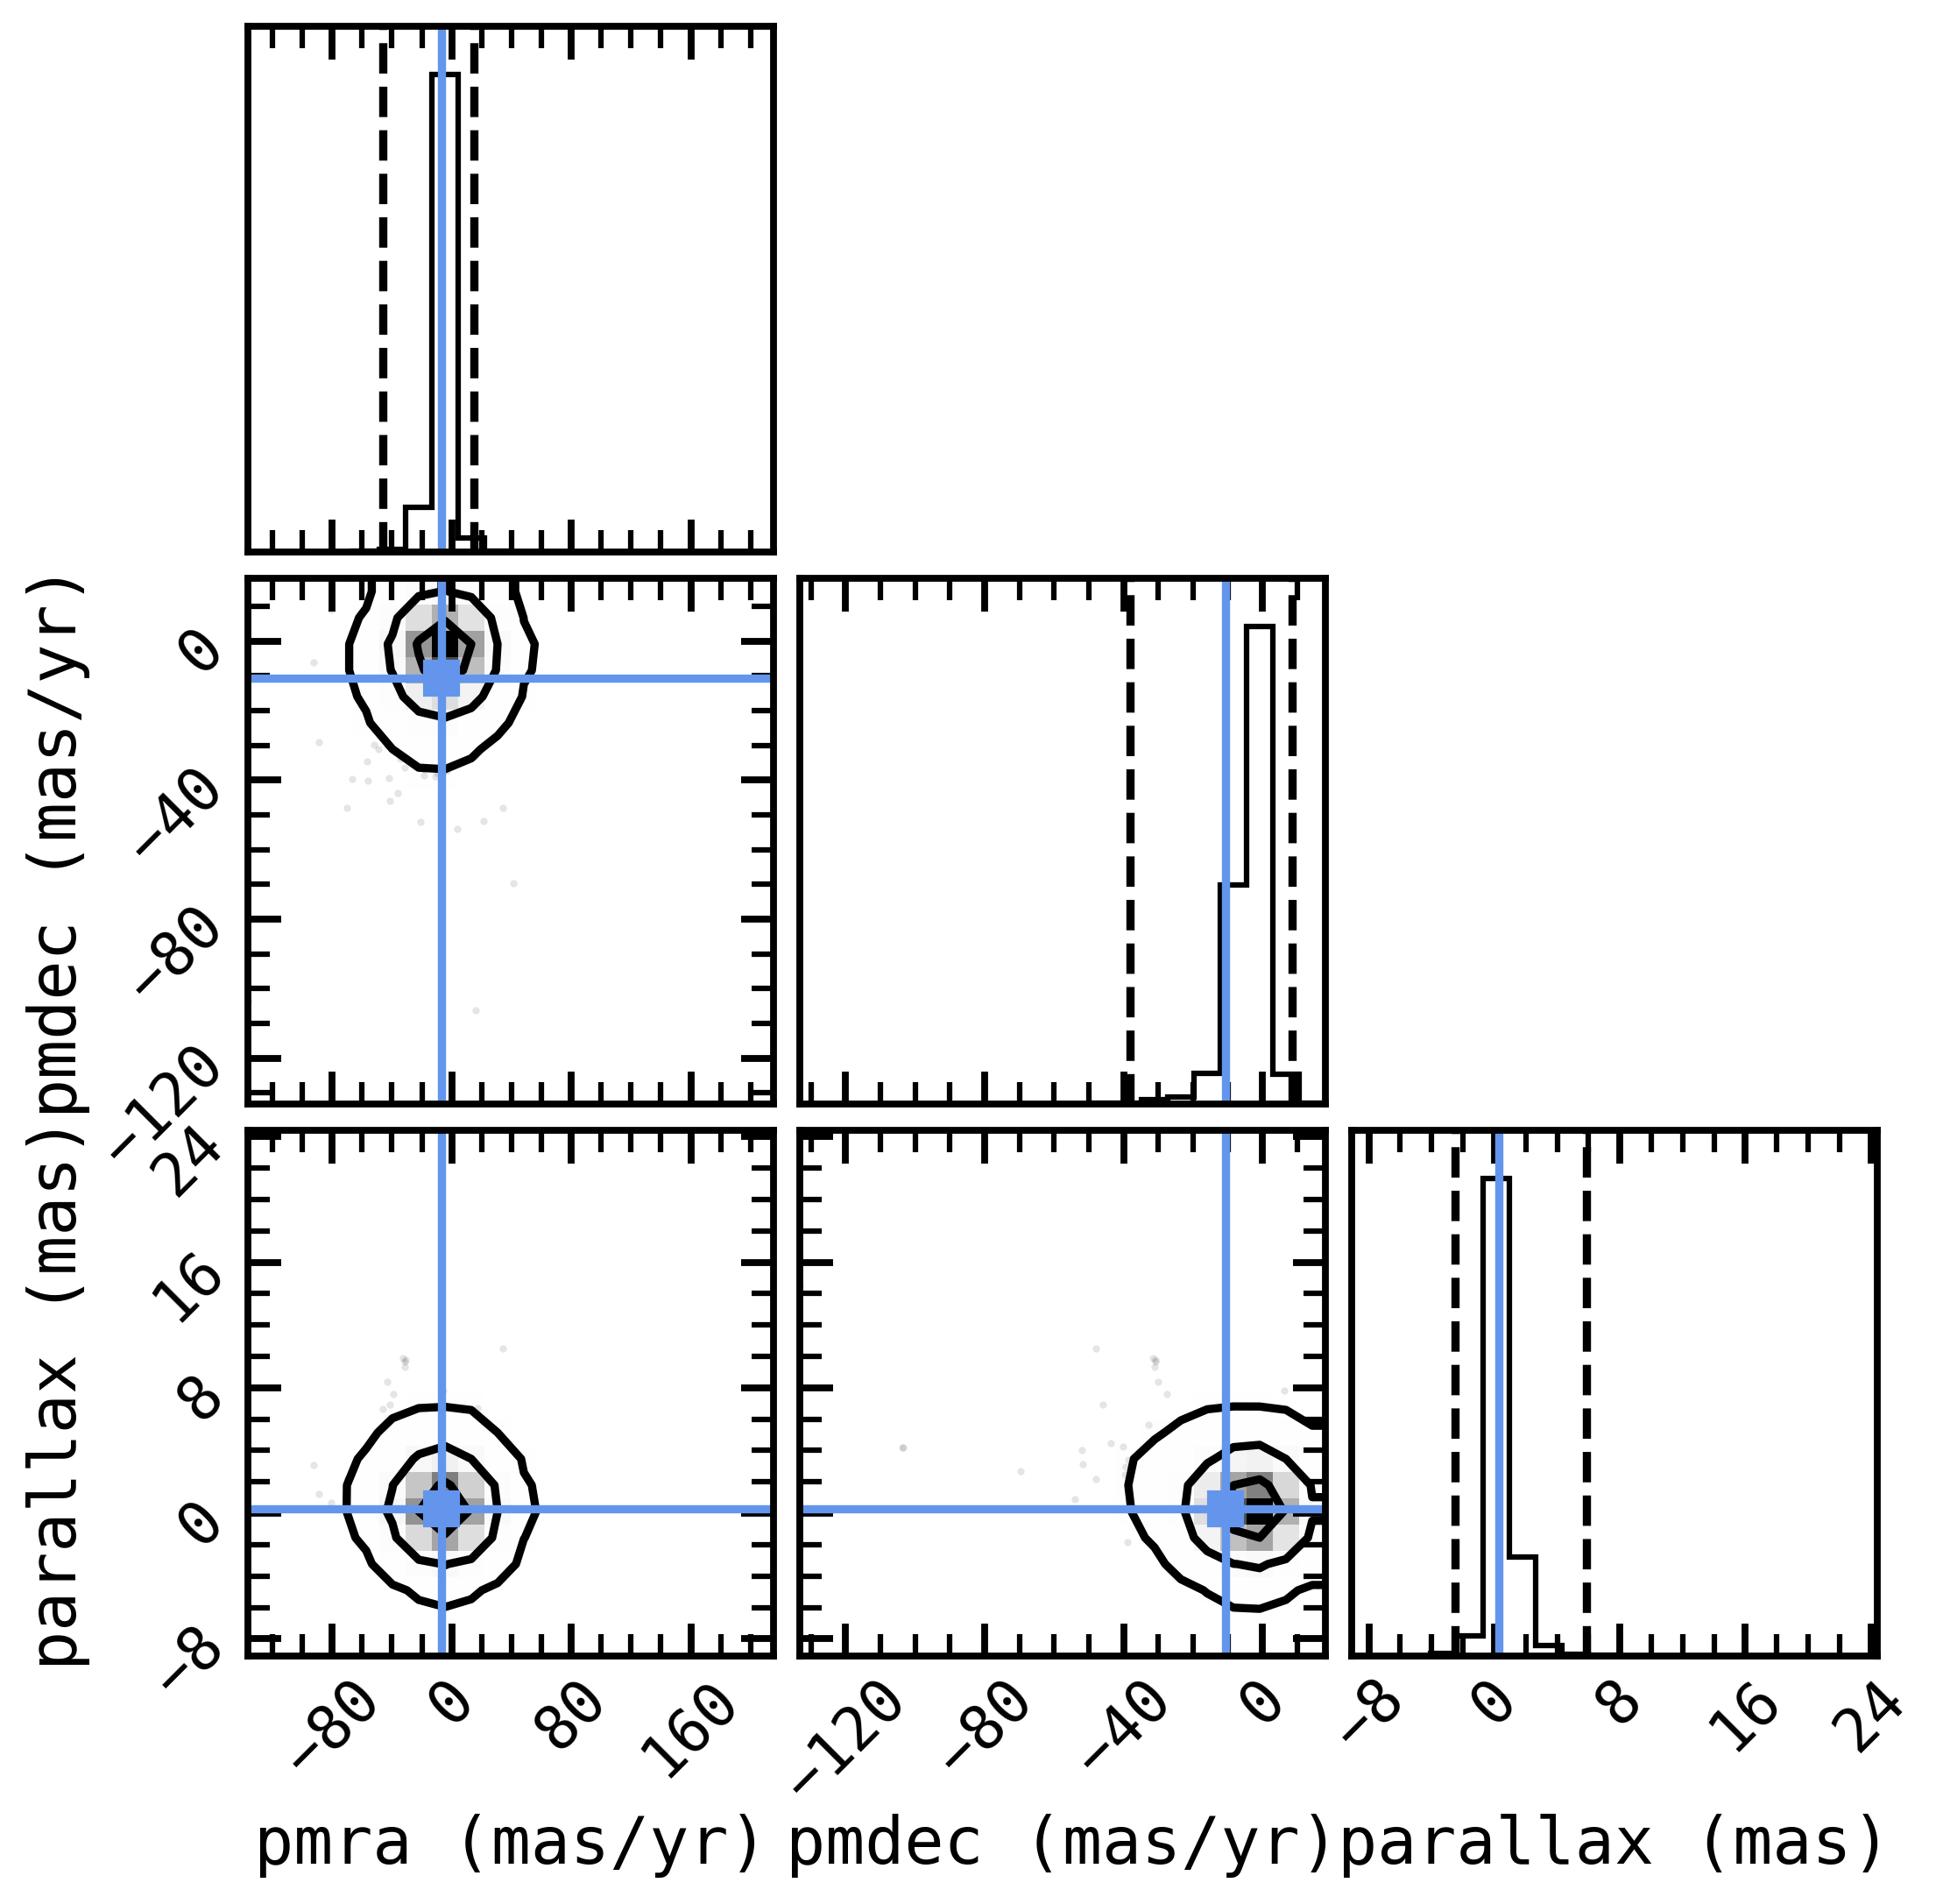

In [9]:
fig_track, fig_post, fig_diag, fig_prior, fig_hood = \
    track.generate_plots(days_backward=1.*365.,
                         days_forward=4.*365,
                         step_size=10.,
                         plot_radec=False,
                         plot_stationary=True,
                         fileprefix='./',
                         filepost='.png')

Unfortunately for HD131339 Ab, it looks like the data is well fit by a distant, quickly moving background star (as it turns out, the candidate's spectral energy distribution is also well fit by stellar spectral types). We've just reproduced a key result of [Nielsen et al. (2017)](https://ui.adsabs.harvard.edu/abs/2017AJ....154..218N/abstract)'s argument (see their figure 19). If we were to publish this result, we'd probably want to increase our number of live points (or use dynamic nested sampling) to fully sample the posterior and be sure of our final numbers.

## What next?

Depending on the result of `backtracks.System.fit`, you could compare the goodness of fit between the median of this posterior distribution of background star cases to that of a bound, planetary orbit to decide whether your candidate is a planet or not. You can access the samples, or the median sample, from the `System` object via `System.results.samples`, and report the goodness of fit with `System.median_chi2_red`. 

In the case where there is little curvature in your data, and `backtracks.System.fit` reproduces effectively linear motion with the same parallax as the host, that's pretty good evidence that you have a bound body (a planet!) on your hands. We'd recommend using `orbitize!` or another orbit fitting package to assess this case, and compare to your `backtracks` results. If the motion is poorly fit by both a bound orbit and a moving, finite distance background track, then something even weirder might be going on.

Feel free to reach out to the developers (William, Gilles, and Tomas) if you run into any trouble using the code, or if you'd like advice on any particular use cases.